In [16]:
from AppalachianRL.envs.trail import AppalachianTrailEnv


env = AppalachianTrailEnv()

obs, info = env.reset()
done = False

while not done:
    action = env.action_space.sample()
    obs, reward, done, trunc, info = env.step(action)
    env.render()


Day 1: 2185.0 miles left | Energy 80.2 | Food 9.0 | Weather 1

   Invalid Action: No resupply point nearby.

Day 2: 2168.0 miles left | Energy 100.0 | Food 9.0 | Weather 0
Day 3: 2168.0 miles left | Energy 100.0 | Food 8.5 | Weather 0
Day 4: 2158.0 miles left | Energy 88.0 | Food 7.7 | Weather 1
Day 5: 2145.0 miles left | Energy 73.7 | Food 6.7 | Weather 0

   Invalid Action: No resupply point nearby.

Day 6: 2130.0 miles left | Energy 100.0 | Food 6.7 | Weather 0
Day 7: 2130.0 miles left | Energy 100.0 | Food 6.2 | Weather 1
Day 8: 2130.0 miles left | Energy 100.0 | Food 5.7 | Weather 2
Day 9: 2105.0 miles left | Energy 70.0 | Food 4.5 | Weather 0
Day 10: 2105.0 miles left | Energy 100.0 | Food 4.0 | Weather 0
Day 11: 2105.0 miles left | Energy 100.0 | Food 3.5 | Weather 0
Day 12: 2105.0 miles left | Energy 100.0 | Food 3.0 | Weather 0
Day 13: 2088.0 miles left | Energy 81.3 | Food 2.0 | Weather 0

   Invalid Action: No resupply point nearby.

Day 14: 2063.0 miles left | Energy 100.0 


Training Q-Learning...

   Success: Congrats, you completed the AT!


   Success: Congrats, you completed the AT!


   Success: Congrats, you completed the AT!


   Success: Congrats, you completed the AT!


   Success: Congrats, you completed the AT!


   Invalid Action: No resupply point nearby.


   Success: Congrats, you completed the AT!


   Success: Congrats, you completed the AT!


   Success: Congrats, you completed the AT!


   Success: Congrats, you completed the AT!


   Success: Congrats, you completed the AT!


   Success: Congrats, you completed the AT!


   Success: Congrats, you completed the AT!


   Success: Congrats, you completed the AT!


   Success: Congrats, you completed the AT!


   Invalid Action: No resupply point nearby.


   Success: Congrats, you completed the AT!


   Success: Congrats, you completed the AT!


   Invalid Action: No resupply point nearby.


   Success: Congrats, you completed the AT!


   Success: Congrats, you completed the AT!


   Suc

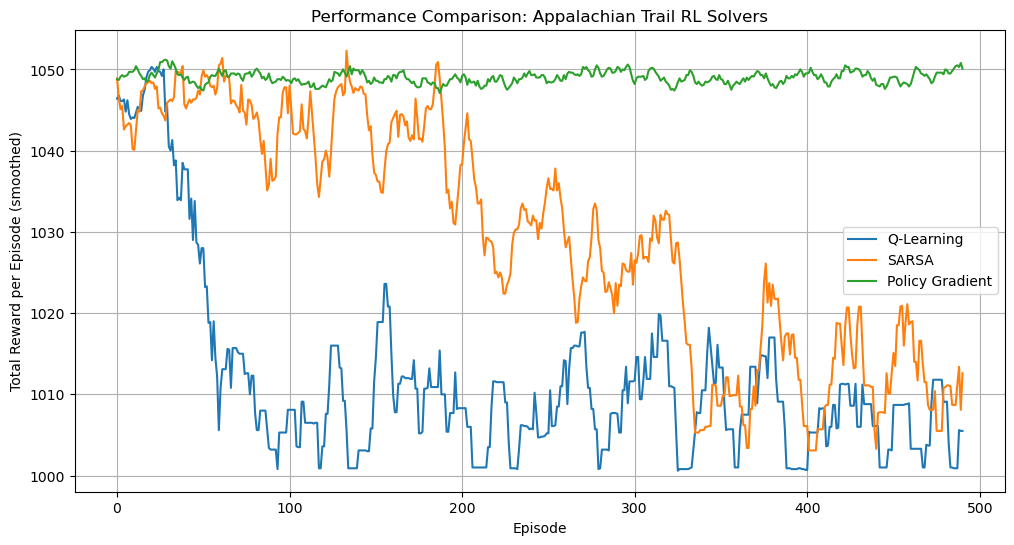

In [19]:
import matplotlib.pyplot as plt
import numpy as np

from AppalachianRL.envs.trail import AppalachianTrailEnv
from AppalachianRL.solvers.q_learning import QLearningSolver
from AppalachianRL.solvers.sarsa import SarsaSolver
from AppalachianRL.solvers.policy_gradient import PolicyGradientSolver

# ---------------------------
# Experiment Parameters
# ---------------------------
EPISODES = 500      # number of training episodes for each solver
SEED = 2025

# ---------------------------
# Initialize environment
# ---------------------------
# env = AppalachianTrailEnv(seed=SEED)
env = AppalachianTrailEnv(trail_length=50, max_energy=100, max_food=10)

# ---------------------------
# Initialize solvers
# ---------------------------
solvers = {
    "Q-Learning": QLearningSolver(env, learning_rate=0.1, gamma=0.99, epsilon=0.2, seed=SEED),
    "SARSA": SarsaSolver(env, learning_rate=0.1, gamma=0.99, epsilon=0.2, seed=SEED),
    "Policy Gradient": PolicyGradientSolver(env, lr=1e-3, gamma=0.99, seed=SEED)
}

# ---------------------------
# Train each solver and collect rewards
# ---------------------------
all_rewards = {}

for name, solver in solvers.items():
    print(f"\nTraining {name}...")
    rewards = solver.train(episodes=EPISODES)
    all_rewards[name] = rewards

# ---------------------------
# Plot results
# ---------------------------
plt.figure(figsize=(12, 6))
for name, rewards in all_rewards.items():
    smoothed = np.convolve(rewards, np.ones(10)/10, mode='valid')
    plt.plot(smoothed, label=name)

plt.title("Performance Comparison: Appalachian Trail RL Solvers")
plt.xlabel("Episode")
plt.ylabel("Total Reward per Episode (smoothed)")
plt.legend()
plt.grid(True)
plt.show()
